# BoltzmannDistribution#
Behorende bij de werkzitting oefeningen over de Boltzmann Distributie.

In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

## Oefening 1: CHN-molecule ##
<img align="left" src="images/HCNdensity_DFT.jpg" WIDTH="250">
Kwantum mechanische berekeningen geven ons de beste beschrijving van de moleculaire werkelijkheid welke we kunnen bekomen. 
Een heel praktische (en computationeel effici√´nte) benadering is de dichtheidsfunctionaal benadering (DFT), die on toe 
laat kwantum mechanische berekeningen uit te voeren op systemen met honderden of zelfs duizenden atomen. Er is 
echter wel een belangrijke beperking in deze (en andere) kwantum mechanische berekeningen: ze worden uitgevoerd bij Kelvin (of zonder temperatuur). Er kan echter een goede eerste benadering worden gemaakt van de temperatuursbijdrage op de energy van zo een systeem, door de vibrationele energie bijdrage te bepalen. Dit kan door bij elke temperatuur te kijken welke toestanden bezet zijn. Ik heb voor jullie het vibrationeel spectrum van een HCN molecule berekend (zie tabel). Elke vibrationele ‚Äúmode‚Äù kan gezien worden als een energetisch toestandsniveau.

- Bereken de bezetting van de verschillende niveaus bij volgende temperaturen: ($ùëò_ùêµ=8.617\times 10^{‚àí5}$ ùëíV/ùêæ )
  - 0K (absoluut nulpunt)
  - 4K (temperatuur vloeibare H)
  - 70K (temperatuur vloeibare N)
  - 300K (‚Äúkamertemperatuur‚Äù voor de computationele onderzoeker)
  - 1000K
- Bij welke T zullen alle moleculen trillen volgens de 6e mode?

| mode | Energy (meV) |
|------|--------------|
| 1    | 2.26         |
| 2    | 2.26         |
| 3    | 89.84        |
| 4    | 89.84        |
| 5    | 263.38       |
| 6    | 417.53       |

### Oplossing ###
Bij deze oefening maken we gebruik van de Boltzmann distributie:

$ N_i = \frac{N g_i exp(-\frac{\epsilon_i}{k_BT})}{\sum_{j=1}^{\infty}{g_j exp(-\frac{\epsilon_j}{k_BT})}} $.

Gezien $N$ onbekend (en een groot getal) is, brengen we deze naar de andere kant van onze vergelijking zodat we de bezetting zullen beschrijven in termen van de fractie van het totaal aantal deeltjes ($\frac{N_i}{N}$) in plaats van absolute aantallen. De ontaarding $g_i$ vinden we door de tabel te bestuderen. We zien dat er 4 verschillende energi√´n zijn. De laagste twee energieniveaus zijn 2-voudig ontaard ($g_i=2$) terwijl de twee hoogste energieniveaus niet ontaard zijn ($g_i=1$).

Met deze kennis kunnen we aan de slag om het een en ander uit te rekenen in een excel werkblad of in een jupyter notebook.

In [13]:
## Enkele constanten:
nT=6 # aantal temperaturen
kb=8.617E-2   # in meV/K
epsi=[2.26, 89.84, 263.38, 417.53] # alle energi√´n in meV
gi=[2,2,1,1] # de ontaardingen
T=[1.0E-6,4,70,300,1000, 10.0E6] # De temperaturen

for i in range(nT):
    Ni=np.zeros(len(epsi))
    for j in range(len(epsi)):
        Ni[j]=gi[j]*np.exp(-(epsi[j])/(kb*T[i]))
    Z=np.sum(Ni)  # de partitiefunctie
    Ni/=Z
    Ni*=100.0 #in percent
    print('Bezetting bij T= %5i  N1= %8.6e N2= %8.6e N3= %8.6e N4= %8.6e'%(T[i], Ni[0],Ni[1],Ni[2],Ni[3]))

Bezetting bij T=     0  N1=      nan N2=      nan N3=      nan N4=      nan
Bezetting bij T=     4  N1= 1.000000e+02 N2= 4.464666e-109 N3= 0.000000e+00 N4= 0.000000e+00
Bezetting bij T=    70  N1= 9.999995e+01 N2= 4.946220e-05 N3= 7.914621e-18 N4= 6.305062e-29
Bezetting bij T=   300  N1= 9.673042e+01 N2= 3.267585e+00 N3= 1.984909e-03 N4= 5.105454e-06
Bezetting bij T=  1000  N1= 7.193746e+01 N2= 2.603480e+01 N3= 1.737350e+00 N4= 2.903859e-01
Bezetting bij T= 10000000  N1= 3.333882e+01 N2= 3.333544e+01 N3= 1.666436e+01 N4= 1.666138e+01


D:\10_Software\15_anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


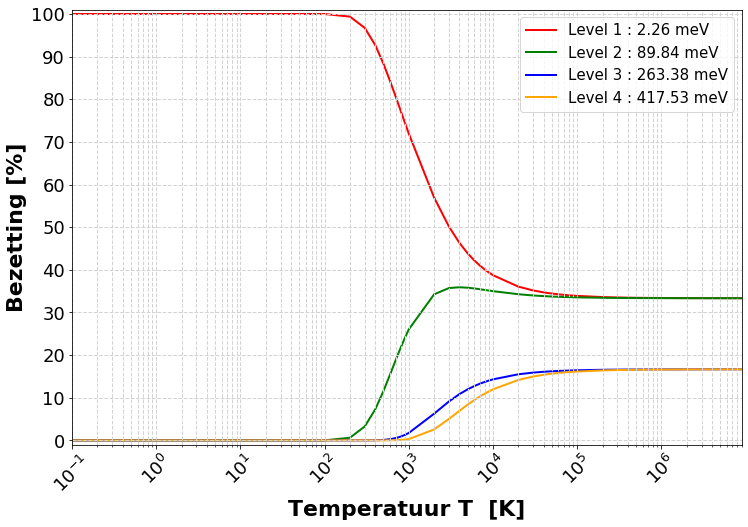

In [14]:
## Dezelfde oefening maar nu met een grafiek over een T range
kb=8.617E-2   # in meV/K
epsi=[2.26, 89.84, 263.38, 417.53] # alle energi√´n in meV
gi=[2,2,1,1] # de ontaardingen
T=np.logspace(start = -1, stop = 6, num = 8, base = 10)
factors=np.array([1,2,3,4,5,6,7,8,9])
Tgrid=list()
for eenT in T:
    Tgrid.extend(factors*eenT)

nT=len(Tgrid)    
NiT=np.zeros((len(epsi),nT))
for i in range(nT):
    Ni=np.zeros(len(epsi))
    for j in range(len(epsi)):
        Ni[j]=gi[j]*np.exp(-(epsi[j])/(kb*Tgrid[i]))
    Z=np.sum(Ni)  # de partitiefunctie
    NiT[:,i]=(Ni[:]/Z)*100
    #print('Bezetting bij T= %8.6e  N1= %8.6e N2= %8.6e N3= %8.6e N4= %8.6e'%(Tgrid[i], Ni[0],Ni[1],Ni[2],Ni[3]))

#plotje   
xmin=np.min(Tgrid)
xmax=np.max(Tgrid)
ymin=np.min(-1)
ymax=np.max(101)

plt.figure(figsize=(12,8))

cnt=0
collst=['red','green','blue','orange']
for Ni in NiT:
    col=collst[cnt]
    cnt+=1
    strlabel="Level "+str(cnt)+" : "+str(epsi[cnt-1])+" meV"
    plt.plot(Tgrid, Ni,   color=col  ,linewidth=2, zorder=-1, label=strlabel)

plt.xscale("log")
plt.yscale("linear")
plt.axis([xmin,xmax,ymin,ymax])

plt.xticks(rotation=45,fontsize=18)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontsize=18)
plt.xlabel("Temperatuur T  [K]",fontsize=22,fontweight="bold")
plt.ylabel("Bezetting [%]",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)
plt.legend(fontsize=15)

plt.show()

## Oefening 2: Theoretisch model ##
<img align="right" src="images/BoltzmannNiveaus.jpg" WIDTH="350">

1 mol deeltjes zijn verdeeld volgens de Boltzmann distributie. Elk deeltje kan √©√©n van zeven mogelijke kwantum toestanden (zie figuur) bezetten. De laagste toestand heeft energie 0, er zijn twee toestanden met energie 3D en vier toestanden met energie 6D.
- Hoeveel deeltjes bevinden zich in elke toestand bij een temperatuur T= D/kB

In [15]:
## Enkele constanten:
nT=1 # aantal temperaturen
epsi=[0, 3, 6] # alle energi√´n in D
gi=[1,2,4] # de ontaardingen
T=[1] # De temperaturen in D/kB

for i in range(nT):
    Ni=np.zeros(len(epsi))
    for j in range(len(epsi)):
        Ni[j]=gi[j]*np.exp(-(epsi[j])/(T[i]))
    Z=np.sum(Ni)  # de partitiefunctie
    Ni/=Z
    Ni*=100.0 # in %
    print('Bezetting bij T= %5i D/kB  N1= %8.3f %% N2= %8.3f %% N3= %8.3f %% '%(T[i], Ni[0],Ni[1],Ni[2]))

Bezetting bij T=     1 D/kB  N1=   90.132 % N2=    8.975 % N3=    0.894 % 


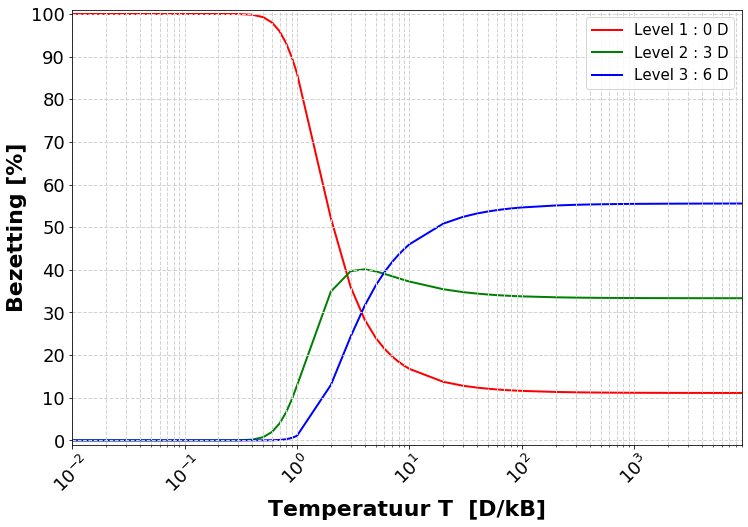

In [17]:
## Dezelfde oefening maar nu met een grafiek over een T range
epsi=[0, 3, 6] # alle energi√´n in D
#gi=[1,2,4]
gi=[2,6,10] # de ontaardingen--> s, p, d
T=np.logspace(start = -2, stop = 3, num = 6, base = 10)
factors=np.array([1,2,3,4,5,6,7,8,9])
Tgrid=list()
for eenT in T:
    Tgrid.extend(factors*eenT)

nT=len(Tgrid)    
NiT=np.zeros((len(epsi),nT))
for i in range(nT):
    Ni=np.zeros(len(epsi))
    for j in range(len(epsi)):
        Ni[j]=gi[j]*np.exp(-(epsi[j])/(Tgrid[i]))
    Z=np.sum(Ni)  # de partitiefunctie
    NiT[:,i]=(Ni[:]/Z)*100
    #print('Bezetting bij T= %8.6e  N1= %8.6e N2= %8.6e N3= %8.6e N4= %8.6e'%(Tgrid[i], Ni[0],Ni[1],Ni[2],Ni[3]))

#plotje   
xmin=np.min(Tgrid)
xmax=np.max(Tgrid)
ymin=np.min(-1)
ymax=np.max(101)

plt.figure(figsize=(12,8))

cnt=0
collst=['red','green','blue']
for Ni in NiT:
    col=collst[cnt]
    cnt+=1
    strlabel="Level "+str(cnt)+" : "+str(epsi[cnt-1])+" D"
    plt.plot(Tgrid, Ni,   color=col  ,linewidth=2, zorder=-1, label=strlabel)

plt.xscale("log")
plt.yscale("linear")
plt.axis([xmin,xmax,ymin,ymax])

plt.xticks(rotation=45,fontsize=18)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontsize=18)
plt.xlabel("Temperatuur T  [D/kB]",fontsize=22,fontweight="bold")
plt.ylabel("Bezetting [%]",fontsize=22,fontweight="bold")
plt.grid(b=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=1)
plt.legend(fontsize=15)

plt.show()